In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%run AnalysisHelperFile.ipynb


Variables: put_sell_study_dict
           profit_put_sell_study_dict
           loss_put_sell_study_dict



In [4]:
put_sell_study_dict.keys()

dict_keys(['naked_50', 'naked_dte', 'verticle_50', 'verticle_dte'])

In [15]:
for study in put_sell_study_dict:
    print(study, 'profit:', round(loss_put_sell_study_dict[study]['PROFIT'].sum(), 2))

naked_50 profit: -69.1
naked_dte profit: -48.3
verticle_50 profit: -38.74
verticle_dte profit: -25.55


In [5]:
for study in put_sell_study_dict:
    print(study, '# of trades:', len(put_sell_study_dict[study]))

naked_50 # of trades: 46
naked_dte # of trades: 22
verticle_50 # of trades: 47
verticle_dte # of trades: 22


In [13]:
loss_put_sell_study_dict['naked_dte']

,STRIKE,TRADE_DATE,TRADE_LAST_PRICE,DTE,EXIT_DATE,EXIT_LAST_PRICE,EXPIRE_DATE,AMOUNT_REC,AMOUNT_BUYBACK,PROFIT_PERCENT,PROFIT
0,150.00,2017-05-25,153.91,43.0,2017-07-07,144.17,2017-07-07,1.915,5.80,-202.872063,-3.885
1,195.00,2018-11-06,203.78,44.0,2018-12-20,156.84,2018-12-20,4.280,37.83,-783.878505,-33.550
2,305.00,2020-01-23,319.29,43.0,2020-03-06,289.06,2020-03-06,6.155,15.52,-152.152721,-9.365
3,126.25,2020-09-01,134.22,45.0,2020-10-16,118.96,2020-10-16,5.595,7.10,-26.899017,-1.505


In [14]:
loss_put_sell_study_dict['naked_50']

,STRIKE,TRADE_DATE,TRADE_LAST_PRICE,DTE,EXIT_DATE,EXIT_LAST_PRICE,EXPIRE_DATE,AMOUNT_REC,AMOUNT_BUYBACK,PROFIT_PERCENT,PROFIT
0,217.50,2018-09-28,225.77,42.04,2018-11-09,204.47,2018-11-09,4.180,13.125,-213.995215,-8.945
1,185.00,2018-11-13,192.23,45.00,2018-12-28,156.23,2018-12-28,4.470,28.700,-542.058166,-24.230
2,202.50,2019-05-02,209.17,43.00,2019-06-14,192.74,2019-06-14,3.320,8.850,-166.566265,-5.530
3,312.50,2020-01-30,323.87,42.96,2020-03-13,278.06,2020-03-13,6.245,35.130,-462.530024,-28.885
4,126.25,2020-09-01,134.22,45.00,2020-10-16,118.96,2020-10-16,5.595,7.100,-26.899017,-1.505


# Why do two naked trade have such big loss difference

lets collect the price of when there was a big loss

In [17]:
aapl_put_df = pd.read_csv('C:\\Users\\bkim5\\EVERYTHING CODING\\PROJECT\\Options project\\2. Data Wrangling\\aapl_put_df.csv')

convert `QUOTE_DATE` column to datetime and collect only `QUOTE_DATE` and `LAST_PRICE` columns

In [18]:
aapl_put_df['QUOTE_DATE']= pd.to_datetime(aapl_put_df['QUOTE_DATE'])
price_history = aapl_put_df[['QUOTE_DATE', 'LAST_PRICE']]
price_history = price_history.drop_duplicates()
price_history = price_history.reset_index(drop=True)
price_history

,QUOTE_DATE,LAST_PRICE
0,2017-01-03,116.14
1,2017-01-04,116.02
2,2017-01-05,116.61
3,2017-01-06,117.91
4,2017-01-09,119.00
...,...,...
997,2020-12-23,131.01
998,2020-12-28,136.73
999,2020-12-29,134.87
1000,2020-12-30,133.72


### Retrieve the timeframe of the biggest loss around the same timeframe difference between two studies
- 2020-01-30 ~ 2020-03-13 `naked_50`
- 2020-01-23 ~ 2020-03-06 `naked_dte`

In [22]:
loss_put_sell_study_dict['naked_dte']

,STRIKE,TRADE_DATE,TRADE_LAST_PRICE,DTE,EXIT_DATE,EXIT_LAST_PRICE,EXPIRE_DATE,AMOUNT_REC,AMOUNT_BUYBACK,PROFIT_PERCENT,PROFIT
0,150.00,2017-05-25,153.91,43.0,2017-07-07,144.17,2017-07-07,1.915,5.80,-202.872063,-3.885
1,195.00,2018-11-06,203.78,44.0,2018-12-20,156.84,2018-12-20,4.280,37.83,-783.878505,-33.550
2,305.00,2020-01-23,319.29,43.0,2020-03-06,289.06,2020-03-06,6.155,15.52,-152.152721,-9.365
3,126.25,2020-09-01,134.22,45.0,2020-10-16,118.96,2020-10-16,5.595,7.10,-26.899017,-1.505


In [23]:
loss_put_sell_study_dict['naked_50']

,STRIKE,TRADE_DATE,TRADE_LAST_PRICE,DTE,EXIT_DATE,EXIT_LAST_PRICE,EXPIRE_DATE,AMOUNT_REC,AMOUNT_BUYBACK,PROFIT_PERCENT,PROFIT
0,217.50,2018-09-28,225.77,42.04,2018-11-09,204.47,2018-11-09,4.180,13.125,-213.995215,-8.945
1,185.00,2018-11-13,192.23,45.00,2018-12-28,156.23,2018-12-28,4.470,28.700,-542.058166,-24.230
2,202.50,2019-05-02,209.17,43.00,2019-06-14,192.74,2019-06-14,3.320,8.850,-166.566265,-5.530
3,312.50,2020-01-30,323.87,42.96,2020-03-13,278.06,2020-03-13,6.245,35.130,-462.530024,-28.885
4,126.25,2020-09-01,134.22,45.00,2020-10-16,118.96,2020-10-16,5.595,7.100,-26.899017,-1.505


In [37]:
between_price_dte = price_history.loc[(price_history['QUOTE_DATE'] > '2020-01-23') & (price_history['QUOTE_DATE'] < '2020-03-06')]
between_price_dte = between_price_dte.reset_index(drop=True)
between_price_dte['QUOTE_DATE'] = between_price_dte['QUOTE_DATE'].astype(str)
between_price_dte

,QUOTE_DATE,LAST_PRICE
0,2020-01-24,318.33
1,2020-01-27,308.97
2,2020-01-28,317.69
3,2020-01-29,324.34
4,2020-01-30,323.87
5,2020-01-31,309.33
6,2020-02-03,308.72
7,2020-02-04,318.85
8,2020-02-05,321.45
9,2020-02-06,325.21


In [38]:
between_price_50 = price_history.loc[(price_history['QUOTE_DATE'] > '2020-01-30') & (price_history['QUOTE_DATE'] < '2020-03-13')]
between_price_50 = between_price_50.reset_index(drop=True)
between_price_50['QUOTE_DATE'] = between_price_50['QUOTE_DATE'].astype(str)
between_price_50

,QUOTE_DATE,LAST_PRICE
0,2020-01-31,309.33
1,2020-02-03,308.72
2,2020-02-04,318.85
3,2020-02-05,321.45
4,2020-02-06,325.21
5,2020-02-07,320.03
6,2020-02-10,321.55
7,2020-02-11,319.61
8,2020-02-12,327.20
9,2020-02-13,324.87


In [39]:
price_date_dte = between_price_dte['QUOTE_DATE'].tolist()
last_price_dte = between_price_dte['LAST_PRICE'].tolist()
 
price_date_50 = between_price_50['QUOTE_DATE'].tolist()
last_price_50 = between_price_50['LAST_PRICE'].tolist()

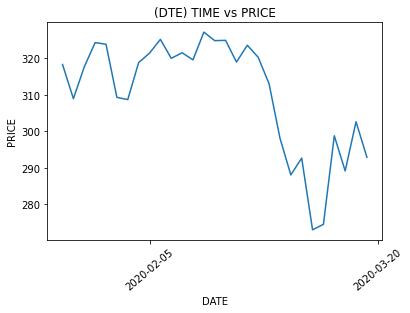

In [40]:
plt.plot(price_date_dte, last_price_dte)
plt.title('(DTE) TIME vs PRICE')
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.gca().set_xticks(['2020-02-05', '2020-03-20'])
plt.xticks(rotation=40)
plt.show()

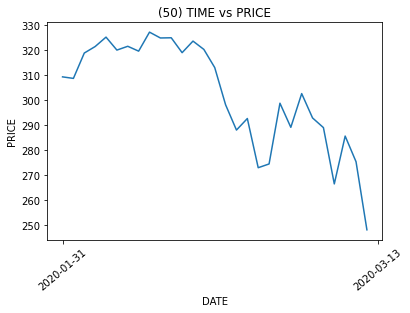

In [41]:
plt.plot(price_date_50, last_price_50)
plt.title('(50) TIME vs PRICE')
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.gca().set_xticks(['2020-01-31', '2020-03-13'])
plt.xticks(rotation=40)
plt.show()

In [42]:
entry_price = last_price_dte[0]
exit_price = last_price_dte[-1]
print('Option entry stock price:', entry_price)
print('Option exit stock price:', exit_price)
print('Price change:', exit_price - entry_price)
print('Price change %:', ((exit_price - entry_price) / entry_price) * 100)

Option entry stock price: 318.33
Option exit stock price: 292.92
Price change: -25.409999999999968
Price change %: -7.982282536989907


In [43]:
entry_price = last_price_50[0]
exit_price = last_price_50[-1]
print('Option entry stock price:', entry_price)
print('Option exit stock price:', exit_price)
print('Price change:', exit_price - entry_price)
print('Price change %:', ((exit_price - entry_price) / entry_price) * 100)

Option entry stock price: 309.33
Option exit stock price: 248.23
Price change: -61.099999999999994
Price change %: -19.752368021207122


# Takeaway
`naked_put_sell_dte` will exit trade only when the contract has expired


`naked_put_sell_50` will exit trade only when the profit target has reached 50%


- For that reason, their entry and exit condition is different meaning their stock price timeframe is also different


- The entry and exit date of `naked_put_sell_dte` was significantly more unfortunate than `naked_put_sell_50` because `naked_put_sell_dte` had bigger stock price decrease


- If more data was included, `naked_put_sell_50` would eventually be in `naked_put_sell_dte` position and the loss will plateau

### This takeaway also applies to verticle trade